# Capstone 3 Preprocessing and Training Data

## Contents
1. [Imports](#1.-Imports)
2. [Load Plant Averages Data](#2.-Load-Plant-Averages-Data)
3. [Plant 1](#3.-Plant-1)
    * [3.1 Train-Test-Split](#3.1-Train-Test-Split)
    * [3.2 Simple Linear Regression](#3.2-Simple-Linear-Regression)
    * [3.3 Pipelines](#3.3-Pipelines)
        * [3.3.1 Linear Regression Model Pipeline](#3.3.1-Linear-Regression-Model-Pipeline)
        * [3.3.2 Random Forest Model Pipeline](#3.3.2-Random-Forest-Model-Pipeline)
        * [3.3.3 Gradient Boosting Model Pipeline](#3.3.3-Gradient-Boosting-Model-Pipeline)
4. [Plant 2](#4.-Plant-2)
    * [4.1 Train-Test-Split](#4.1-Train-Test-Split)
    * [4.2 Simple Linear Regression](#4.2-Simple-Linear-Regression)
    * [4.3 Pipelines](#4.3-Pipelines)
        * [4.3.1 Linear Regression Model Pipeline](#4.3.1-Linear-Regression-Model-Pipeline)
        * [4.3.2 Random Forest Model Pipeline](#4.3.2-Random-Forest-Model-Pipeline)
        * [4.3.3 Gradient Boosting Model Pipeline](#4.3.3-Gradient-Boosting-Model-Pipeline)
    * [4.4 Neural Network](#4.4-Neural-Network)
5. [Final Model Selection](#5.-Final-Model-Selection)
    * [5.1 Plant 1 Model Performance](#5.1-Plant-1-Model-Performance)
    * [5.2 Plant 2 Model Performance](#5.2-Plant-2-Model-Performance)
6. [Save Models](#6.-Save-Models)

##  1. Imports

In [1]:
import os
import re
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load Plant Averages Data

In [2]:
plant1_avg = pd.read_csv('../data/plant1_avg.csv')
plant2_avg = pd.read_csv('../data/plant2_avg.csv')

In [3]:
# Plant 1 delta_daily_yield Linear Regression

In [4]:
X1 = plant1_avg[['dc_power','ambient_temperature','module_temperature','irradiation']]
y1 = plant1_avg[['delta_daily_yield']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

lm = LinearRegression()
lm.fit(X_train1,y_train1)

y_pred1 = lm.predict(X_test1)

# lm.score(X_test1, y_test1)
print(r2_score(y_test1, y_pred1))
print(lm.coef_)

0.9171670050690655
[[   0.22642725   -3.155705      5.21458359 -161.88076767]]


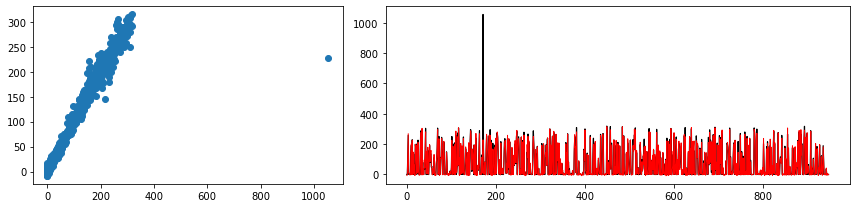

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,3),gridspec_kw={'width_ratios':[2,3]})
ax1.scatter(y_test1, y_pred1)
ax2.plot(np.array(y_test1), color='k', lw=1.2)
ax2.plot(y_pred1, color='r', lw=1)
plt.tight_layout();

In [6]:
# Plant 2 delta_daily_yield Linear Regression

In [7]:
X2 = plant2_avg[['dc_power','ambient_temperature','module_temperature','irradiation']]
y2 = plant2_avg[['delta_daily_yield']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

lm = LinearRegression()
lm.fit(X_train2, y_train2)

y_pred2 = lm.predict(X_test2)

# lm.score(X_test2, y_test2)
print(r2_score(y_test2, y_pred2))
print(lm.coef_)

0.14616321293768764
[[  0.20622663  -4.11975867   6.10694142 -94.97007611]]


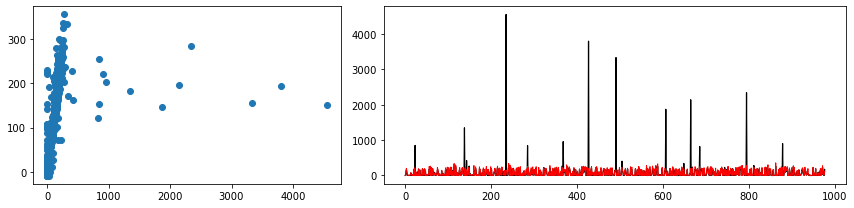

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,3),gridspec_kw={'width_ratios':[2,3]})
ax1.scatter(y_test2, y_pred2)
ax2.plot(np.array(y_test2), color='k', lw=1.2)
ax2.plot(y_pred2, color='r', lw=1)
plt.tight_layout();

## 3. Plant 1

### 3.1 Train-Test-Split

In [9]:
X1 = plant1_avg[['dc_power','ambient_temperature','module_temperature','irradiation']]
y1 = plant1_avg[['delta_daily_yield2']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

### 3.2 Simple Linear Regression

In [10]:
lm = LinearRegression()

lm.fit(X_train1,y_train1)
y_pred1 = lm.predict(X_test1)

# lm.score(X_test1, y_test1)
print(r2_score(y_test1, y_pred1))
print(lm.coef_)

0.9820415148586239
[[   0.22396221   -4.15543123    5.13957867 -148.51227322]]


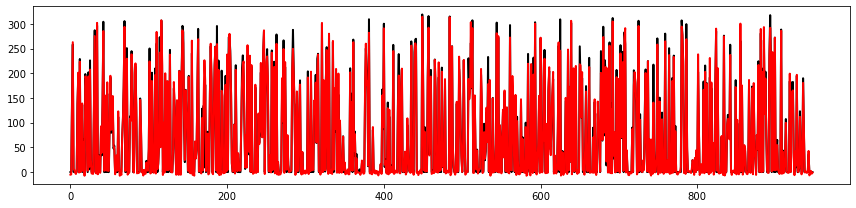

In [11]:
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(np.array(y_test1), color='k', lw=2)
ax.plot(y_pred1, color='r', lw=2)
plt.tight_layout();

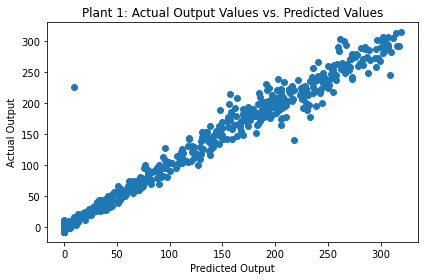

In [12]:
plt.scatter(y_test1, y_pred1)
plt.title('Plant 1: Actual Output Values vs. Predicted Values')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.tight_layout();

### 3.3 Pipelines

#### 3.3.1 Linear Regression Model Pipeline

In [13]:
pipe1 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    LinearRegression())

In [14]:
pipe1.fit(X_train1, y_train1)

y_tr_pred1 = pipe1.predict(X_train1)
y_te_pred1 = pipe1.predict(X_test1)

In [15]:
r2_score(y_train1, y_tr_pred1), r2_score(y_test1, y_te_pred1)

(0.9809153161427486, 0.9820415148586238)

In [16]:
mean_absolute_error(y_train1, y_tr_pred1), mean_absolute_error(y_test1, y_te_pred1)

(7.274750602156005, 6.785768002438349)

In [17]:
mean_squared_error(y_train1, y_tr_pred1), mean_squared_error(y_test1, y_te_pred1)

(182.47063329222345, 164.0122180655153)

In [18]:
# Cross-Validation

In [19]:
cv_results1 = cross_validate(pipe1, X_train1, y_train1, cv=5)

cv_scores1 = cv_results1['test_score']
cv_scores1

array([0.98749212, 0.98363341, 0.98648776, 0.96644865, 0.97870243])

In [20]:
np.mean(cv_scores1), np.std(cv_scores1)

(0.9805528732849931, 0.007683997099734514)

#### 3.3.2 Random Forest Model Pipeline

In [21]:
rf_pipe1 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=123))

In [22]:
rf_default_cv_results1 = cross_validate(rf_pipe1, X_train1, y_train1, cv=5)

rf_cv_scores1 = rf_default_cv_results1['test_score']
rf_cv_scores1

array([0.98714874, 0.98030757, 0.98439975, 0.96087751, 0.97767874])

In [23]:
np.mean(rf_cv_scores1), np.std(rf_cv_scores1)

(0.978082462522585, 0.009200324629814759)

In [24]:
# Hyperparameter search using GridSearchCV

In [25]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params1 = {'randomforestregressor__n_estimators': n_est,
                'standardscaler': [StandardScaler(), None],
                'simpleimputer__strategy': ['mean', 'median']}

rf_grid_cv1 = GridSearchCV(rf_pipe1, param_grid=grid_params1, cv=5, n_jobs=-1)

In [26]:
rf_grid_cv1.fit(X_train1, y_train1.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [27]:
rf_grid_cv1.best_params_

{'randomforestregressor__n_estimators': 784,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [28]:
rf_best_cv_results1 = cross_validate(rf_grid_cv1.best_estimator_, X_train1, y_train1, cv=5)
rf_best_scores1 = rf_best_cv_results1['test_score']
rf_best_scores1

array([0.98734778, 0.98221334, 0.98391377, 0.96124424, 0.97742665])

In [29]:
np.mean(rf_best_scores1), np.std(rf_best_scores1)

(0.9784291549492016, 0.009168089394353795)

#### 3.3.3 Graident Boosting Model Pipeline

In [30]:
gb_pipe1 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    GradientBoostingRegressor(random_state=123))

In [31]:
gb_pipe1.fit(X_train1, y_train1)

gb_y_tr_pred1 = gb_pipe1.predict(X_train1)
gb_y_te_pred1 = gb_pipe1.predict(X_test1)

In [32]:
r2_score(y_train1, gb_y_tr_pred1), r2_score(y_test1, gb_y_te_pred1)

(0.9901477677602548, 0.9803886201754841)

In [33]:
mean_absolute_error(y_train1, gb_y_tr_pred1), mean_absolute_error(y_test1, gb_y_te_pred1)

(4.803703446147645, 5.992640122373996)

In [34]:
mean_squared_error(y_train1, gb_y_tr_pred1), mean_squared_error(y_test1, gb_y_te_pred1)

(94.19820991403544, 179.10786344296557)

In [35]:
# Cross-Validation

In [36]:
gb_default_cv_results1 = cross_validate(gb_pipe1, X_train1, y_train1, cv=5)

gb_cv_scores1 = gb_default_cv_results1['test_score']
gb_cv_scores1

array([0.98683318, 0.98191593, 0.98423446, 0.96152272, 0.97588616])

In [37]:
np.mean(gb_cv_scores1), np.std(gb_cv_scores1)

(0.9780784895955037, 0.009035112392819651)

In [38]:
# Hyperparameter search using GridSearchCV

In [39]:
gb_grid_params1 = {'gradientboostingregressor__n_estimators': [100,150,200],
                   'gradientboostingregressor__max_depth':[1,3,5],
                   'gradientboostingregressor__learning_rate':[0.01,0.1,1],
                   'standardscaler': [StandardScaler(), None],
                   'simpleimputer__strategy': ['mean', 'median']}

gb_grid_cv1 = GridSearchCV(gb_pipe1, param_grid=gb_grid_params1, cv=5, n_jobs=-1)

In [40]:
gb_grid_cv1.fit(X_train1, y_train1.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.01, 0.1,
                                                                      1],
                         'gradientboostingregressor__max_depth': [1, 3, 5],
                         'gradientboostingregressor__n_estimators': [100, 150,
                                                                     200],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [41]:
gb_grid_cv1.best_params_

{'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__max_depth': 5,
 'gradientboostingregressor__n_estimators': 100,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [42]:
gb_best_cv_results1 = cross_validate(gb_grid_cv1.best_estimator_, X_train1, y_train1, cv=5)
gb_best_scores1 = gb_best_cv_results1['test_score']
gb_best_scores1

array([0.98722966, 0.9835134 , 0.98143721, 0.96360912, 0.97641493])

In [43]:
np.mean(gb_best_scores1), np.std(gb_best_scores1)

(0.97844086005829, 0.008198008208143941)

## 4. Plant 2

### 4.1 Train-Test-Split

In [44]:
X2 = plant2_avg[['dc_power','ambient_temperature','module_temperature','irradiation']]
y2 = plant2_avg[['delta_daily_yield2']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

### 4.2 Simple Linear Regression

In [45]:
lm = LinearRegression()

lm.fit(X_train2, y_train2)
y_pred2 = lm.predict(X_test2)

# lm.score(X_test2, y_test2)
print(r2_score(y_test2, y_pred2))
print(lm.coef_)

0.8625044899914732
[[  0.25008326  -0.1930844    2.04605686 -84.89841305]]


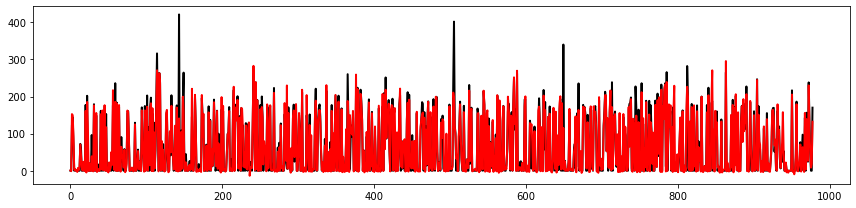

In [46]:
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(np.array(y_test2), color='k', lw=2)
ax.plot(y_pred2, color='r', lw=2)
plt.tight_layout();

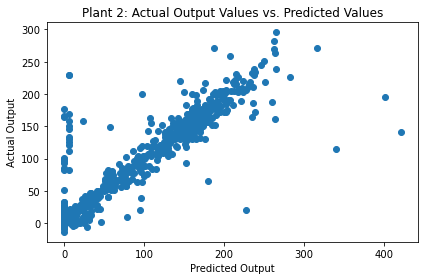

In [47]:
plt.scatter(y_test2, y_pred2)
plt.title('Plant 2: Actual Output Values vs. Predicted Values')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.tight_layout();

### 4.3 Pipelines

#### 4.3.1 Linear Regression Model Pipeline

In [48]:
pipe2 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    LinearRegression())

In [49]:
pipe2.fit(X_train2, y_train2)

y_tr_pred2 = pipe2.predict(X_train2)
y_te_pred2 = pipe2.predict(X_test2)

In [50]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)

(0.8326517363701509, 0.8625044899914732)

In [51]:
mean_absolute_error(y_train2, y_tr_pred2), mean_absolute_error(y_test2, y_te_pred2)

(12.292083974872149, 12.31272638017023)

In [52]:
mean_squared_error(y_train2, y_tr_pred2), mean_squared_error(y_test2, y_te_pred2)

(1086.5576537824686, 872.8920455664698)

In [53]:
# Cross-Validation

In [54]:
cv_results2 = cross_validate(pipe2, X_train2, y_train2, cv=5)

cv_scores2 = cv_results2['test_score']
cv_scores2

array([0.90098592, 0.85723379, 0.8623333 , 0.74641621, 0.78565784])

In [55]:
np.mean(cv_scores2), np.std(cv_scores2)

(0.8305254132756327, 0.05617333628033085)

#### 4.3.2 Random Forest Model Pipeline

In [56]:
rf_pipe2 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=123))

In [57]:
rf_pipe2.fit(X_train2, y_train2)

rf_y_tr_pred2 = rf_pipe2.predict(X_train2)
rf_y_te_pred2 = rf_pipe2.predict(X_test2)

In [58]:
r2_score(y_train2, rf_y_tr_pred2), r2_score(y_test2, rf_y_te_pred2)

(0.9723845364467935, 0.8543383722694551)

In [59]:
mean_absolute_error(y_train2, rf_y_tr_pred2), mean_absolute_error(y_test2, rf_y_te_pred2)

(5.043632559021407, 12.513818974675859)

In [60]:
mean_squared_error(y_train2, rf_y_tr_pred2), mean_squared_error(y_test2, rf_y_te_pred2)

(179.30149160588869, 924.7347508465692)

In [61]:
# Cross-Validation

In [62]:
rf_default_cv_results2 = cross_validate(rf_pipe2, X_train2, y_train2, cv=5)

rf_cv_scores2 = rf_default_cv_results2['test_score']
rf_cv_scores2

array([0.87228292, 0.81264204, 0.81446285, 0.70276564, 0.76022127])

In [63]:
np.mean(rf_cv_scores2), np.std(rf_cv_scores2)

(0.7924749414844772, 0.057179632251852)

In [64]:
# Hyperparameter search using GridSearchCV

In [65]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]

grid_params2 = {'randomforestregressor__n_estimators': n_est,
                'standardscaler': [StandardScaler(), None],
                'simpleimputer__strategy': ['mean', 'median']}

rf_grid_cv2 = GridSearchCV(rf_pipe2, param_grid=grid_params2, cv=5, n_jobs=-1)

In [66]:
rf_grid_cv2.fit(X_train2, y_train2.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [67]:
rf_grid_cv2.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [68]:
rf_best_cv_results2 = cross_validate(rf_grid_cv2.best_estimator_, X_train2, y_train2, cv=5)
rf_best_scores2 = rf_best_cv_results2['test_score']
rf_best_scores2

array([0.87254841, 0.82208518, 0.82160799, 0.70264173, 0.76396005])

In [69]:
np.mean(rf_best_scores2), np.std(rf_best_scores2)

(0.7965686727423057, 0.05820064076445663)

#### 4.3.3 Graident Boosting Model Pipeline

In [70]:
gb_pipe2 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    GradientBoostingRegressor(random_state=123))

In [71]:
gb_pipe2.fit(X_train2, y_train2)

gb_y_tr_pred2 = gb_pipe2.predict(X_train2)
gb_y_te_pred2 = gb_pipe2.predict(X_test2)

In [72]:
r2_score(y_train2, gb_y_tr_pred2), r2_score(y_test2, gb_y_te_pred2)

(0.9231747954902473, 0.8261951882398478)

In [73]:
mean_absolute_error(y_train2, gb_y_tr_pred2), mean_absolute_error(y_test2, gb_y_te_pred2)

(9.967059141671841, 13.679271180194617)

In [74]:
mean_squared_error(y_train2, gb_y_tr_pred2), mean_squared_error(y_test2, gb_y_te_pred2)

(498.810158844016, 1103.4021231471922)

In [75]:
# Cross-Validation

In [76]:
gb_default_cv_results2 = cross_validate(gb_pipe2, X_train2, y_train2, cv=5)

gb_cv_scores2 = gb_default_cv_results2['test_score']
gb_cv_scores2

array([0.87411654, 0.8106763 , 0.83271574, 0.69359874, 0.73747165])

In [77]:
np.mean(gb_cv_scores2), np.std(gb_cv_scores2)

(0.7897157955093477, 0.06539076922433015)

In [78]:
# Hyperparameter search using GridSearchCV

In [79]:
gb_grid_params2 = {'gradientboostingregressor__n_estimators': [100,150,200],
                   'gradientboostingregressor__max_depth':[1],
                   'gradientboostingregressor__learning_rate':[0.1],
                   'standardscaler': [StandardScaler(), None],
                   'simpleimputer__strategy': ['mean', 'median']}

gb_grid_cv2 = GridSearchCV(gb_pipe2, param_grid=gb_grid_params2, cv=5, n_jobs=-1)

In [80]:
gb_grid_cv2.fit(X_train2, y_train2.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.1],
                         'gradientboostingregressor__max_depth': [1],
                         'gradientboostingregressor__n_estimators': [100, 150,
                                                                     200],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [81]:
gb_grid_cv2.best_params_

{'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__max_depth': 1,
 'gradientboostingregressor__n_estimators': 100,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [82]:
gb_best_cv_results2 = cross_validate(gb_grid_cv2.best_estimator_, X_train2, y_train2, cv=5)
gb_best_scores2 = gb_best_cv_results2['test_score']
gb_best_scores2

array([0.88731599, 0.83829021, 0.85206731, 0.73684757, 0.77446506])

In [83]:
np.mean(gb_best_scores2), np.std(gb_best_scores2)

(0.8177972271650555, 0.054511986321688514)

### 4.4 Neural Network

In [84]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor

n_cols = np.array(X2).shape[1]

early_stopping_monitor = EarlyStopping(patience=2)

nn_model = Sequential()
nn_model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train2, y_train2, validation_split=0.3, epochs=100, callbacks=[early_stopping_monitor])

2022-06-15 10:46:54.483277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 1566.9050 - val_loss: 1763.9644
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 923.5614 - val_loss: 1749.5781
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 912.7249 - val_loss: 1747.5978
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 921.8076 - val_loss: 1776.9406
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 894.1271 - val_loss: 1760.6068


In [85]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [86]:
nn_tr_pred = nn_model.predict(X_train2)
nn_te_pred = nn_model.predict(X_test2)

31/31 [==============================] - 0s 865us/step


In [87]:
r2_score(y_train2, nn_tr_pred), r2_score(y_test2, nn_te_pred)

(0.8221529999827903, 0.8565371583972657)

In [88]:
mean_absolute_error(y_train2, nn_tr_pred), mean_absolute_error(y_test2, nn_te_pred)

(12.154539685866839, 11.95960707233505)

In [89]:
mean_squared_error(y_train2, nn_tr_pred), mean_squared_error(y_test2, nn_te_pred)

(1154.7237771069558, 910.7757283246789)

## 5. Final Model Selection

### 5.1 Plant 1 Model Performance

#### Linear Regression Model Performance

In [90]:
lr_neg_mae1 = cross_validate(pipe1, X_train1, y_train1, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [91]:
lr_mae_mean1 = np.mean(lr_neg_mae1['test_score'])
lr_mae_std1 = np.std(lr_neg_mae1['test_score'])
lr_mae_mean1, lr_mae_std1

(-7.308405339052716, 0.3398636330258831)

#### Random Forest Model Performance

In [92]:
rf_neg_mae1 = cross_validate(rf_grid_cv1.best_estimator_, X_train1, y_train1.values.ravel(), 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [93]:
rf_mae_mean1 = np.mean(rf_neg_mae1['test_score'])
rf_mae_std1 = np.std(rf_neg_mae1['test_score'])
rf_mae_mean1, rf_mae_std1

(-6.337834236179145, 0.3836157797514183)

#### Graident Boosting Model Performance

In [94]:
gb_results1 = cross_validate(gb_grid_cv1.best_estimator_, X_train1, y_train1.values.ravel(),
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [95]:
gb_mae_mean1 = np.mean(gb_results1['test_score'])
gb_mae_std1 = np.std(gb_results1['test_score'])
gb_mae_mean1, gb_mae_std1

(-6.422558516987268, 0.30675531184869453)

### 5.2 Plant 2 Model Performance

#### Linear Regression Model Performance

In [96]:
lr_neg_mae2 = cross_validate(pipe2, X_train2, y_train2, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [97]:
lr_mae_mean2 = np.mean(lr_neg_mae2['test_score'])
lr_mae_std2 = np.std(lr_neg_mae2['test_score'])
lr_mae_mean2, lr_mae_std2

(-12.349031155571303, 1.1301050535379398)

#### Random Forest Model Performance

In [98]:
rf_neg_mae2 = cross_validate(rf_grid_cv2.best_estimator_, X_train2, y_train2.values.ravel(), 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [99]:
rf_mae_mean2 = np.mean(rf_neg_mae2['test_score'])
rf_mae_std2 = np.std(rf_neg_mae2['test_score'])
rf_mae_mean2, rf_mae_std2

(-13.562143393087194, 0.9730604245808274)

#### Graident Boosting Model Performance

In [100]:
gb_results2 = cross_validate(gb_grid_cv2.best_estimator_, X_train2, y_train2.values.ravel(),
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [101]:
gb_mae_mean2 = np.mean(gb_results2['test_score'])
gb_mae_std2 = np.std(gb_results2['test_score'])
gb_mae_mean2, gb_mae_std2

(-13.606338705641548, 0.8408813577699167)

#### Neural Network Model Performance

In [102]:
def baseline_model():
    nn_model = Sequential()
    nn_model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
    nn_model.add(Dense(100, activation='relu'))
    nn_model.add(Dense(100, activation='relu'))
    nn_model.add(Dense(1))
    nn_model.compile(optimizer='adam', loss='mean_squared_error')
    return nn_model

# estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
# kfold = KFold(n_splits=5)
# results = cross_validate(estimator, X_train2, y_train2, cv=kfold, scoring='neg_mean_absolute_error')
# nn_mae_mean = np.mean(results['test_score'])
# nn_mae_std = np.std(results['test_score'])
# nn_mae_mean, nn_mae_std

estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X_train2, y_train2, cv=kfold, scoring='neg_mean_absolute_error')
results.mean(), results.std()

(-13.298164806011448, 1.5195710231435986)

## 6. Save Models

In [107]:
# from library.sb_utils import save_file
# modelpath = '../models'

# # Plant 1
# rf_model_plant1 = rf_grid_cv1.best_estimator_
# gb_model_plant1 = gb_grid_cv1.best_estimator_

# save_file(rf_model_plant1, 'rf_model_plant1.pkl', modelpath)
# save_file(gb_model_plant1, 'gb_model_plant1.pkl', modelpath)

# # Plant 2
# rf_model_plant2 = rf_grid_cv2.best_estimator_
# gb_model_plant2 = gb_grid_cv2.best_estimator_

# save_file(rf_model_plant2, 'rf_model_plant2.pkl', modelpath)
# save_file(gb_model_plant2, 'gb_model_plant2.pkl', modelpath)

In [109]:
import pickle

rf_model_plant1 = rf_grid_cv1.best_estimator_
gb_model_plant1 = gb_grid_cv1.best_estimator_
rf_model_plant2 = rf_grid_cv2.best_estimator_
gb_model_plant2 = gb_grid_cv2.best_estimator_

pickle.dump(rf_model_plant1, open(../models/'rf_model_plant1.sav','wb'))
pickle.dump(gb_model_plant1, open('gb_model_plant1.sav','wb'))
pickle.dump(rf_model_plant2, open('rf_model_plant2.sav','wb'))
pickle.dump(gb_model_plant2, open('gb_model_plant2.sav','wb'))

In [111]:
nn_model.save('nn_model_plant2.h5')